In [5]:
# 伽马校正尝试
import numpy as np
from matplotlib import pyplot as plt
import cv2

def gamma_correction(image, gamma=1.0):
    # 构建查找表，实现伽马校正
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")

    # 应用伽马校正
    return cv2.LUT(image, table)

image = cv2.imread("../masked_images/4.jpg")
image = gamma_correction(image, gamma=0.5)


cv2.imwrite('../gamma_2/4-0.5.jpg', image)


True

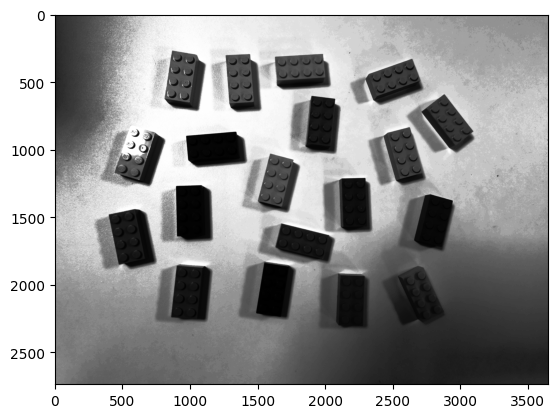

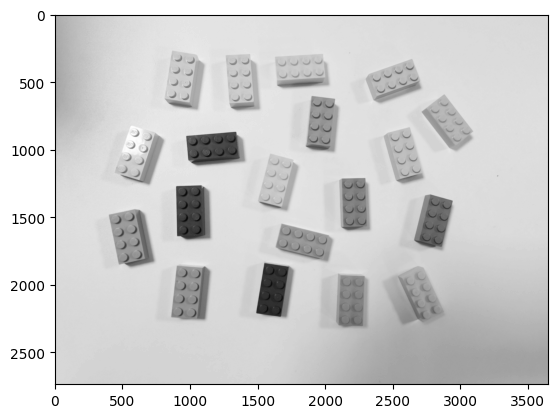

In [33]:
# Sobel & Laplacian
import numpy as np
from matplotlib import pyplot as plt
import cv2

# 光滑
blurred = cv2.GaussianBlur(corrected_gray, (7, 7), 0)

# sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
# sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
# sobel = np.sqrt(sobelx**2 + sobely**2).astype(np.uint8)

laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
laplacian_converted = cv2.convertScaleAbs(laplacian)
sharpened_image = cv2.subtract(blurred, laplacian_converted)

plt.figure(2)
plt.imshow(laplacian_converted, cmap='gray')
plt.figure(3)
plt.imshow(sharpened_image, cmap='gray')


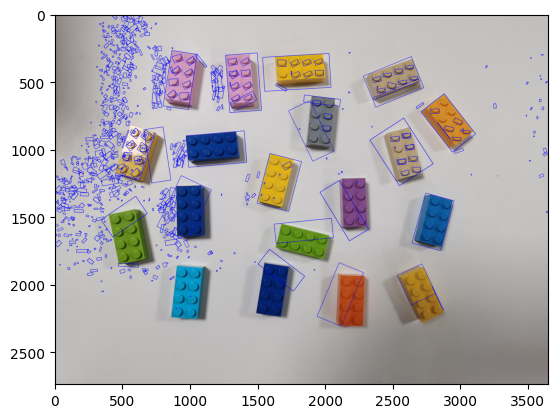

In [40]:
# 绘制方框
import numpy as np
from matplotlib import pyplot as plt
import cv2

count = 0  # 积木个数
margin = 10  # 裁剪边距
draw_rect = image.copy()
for i, contour in enumerate(cnts):
    area = cv2.contourArea(contour)  # 计算包围形状的面积
    if area < 25:  # 过滤面积小于某个值的形状
        continue
    # print(area)
    rect = cv2.minAreaRect(contour)  # 检测轮廓最小外接矩形，得到最小外接矩形的中心(x,y), (宽,高), 旋转角度
    box = np.intp(cv2.boxPoints(rect))  # 获取最小外接矩形的4个顶点坐标
    cv2.drawContours(draw_rect, [box], 0, (255, 0, 0), 2)  # 绘制轮廓最小外接矩形

    h, w = image.shape[:2]  # 原图像的高和宽
    rect_w, rect_h = int(rect[1][0]) + 1, int(rect[1][1]) + 1  # 最小外接矩形的宽和高
    if rect_w <= 100 or rect_h <= 150:
        continue
    count += 1
    if rect_w <= rect_h:
        x, y = int(box[1][0]), int(box[1][1])  # 旋转中心
        M2 = cv2.getRotationMatrix2D((x, y), rect[2], 1)
        rotated_image = cv2.warpAffine(image, M2, (w * 2, h * 2))
        y1, y2 = y - margin if y - margin > 0 else 0, y + rect_h + margin + 1
        x1, x2 = x - margin if x - margin > 0 else 0, x + rect_w + margin + 1
        rotated_canvas = rotated_image[y1: y2, x1: x2]
    else:
        x, y = int(box[2][0]), int(box[2][1])  # 旋转中心
        M2 = cv2.getRotationMatrix2D((x, y), rect[2] + 90, 1)
        rotated_image = cv2.warpAffine(image, M2, (w * 2, h * 2))
        y1, y2 = y - margin if y - margin > 0 else 0, y + rect_w + margin + 1
        x1, x2 = x - margin if x - margin > 0 else 0, x + rect_h + margin + 1
        rotated_canvas = rotated_image[y1: y2, x1: x2]

plt.figure(1)
plt.imshow(cv2.cvtColor(draw_rect, cv2.COLOR_BGR2RGB))